# Schräger Wurf

In dieser Aufgabe soll der schr&auml;ge Wurf eines Balls unter Vernachl&auml;ssigung der Reibung und des Luftwiderstands simuliert werden.

Schreiben Sie zun&auml;chst eine Funktion, die als Parameter eine Anfangsgeschwindigkeit, einen Wurfwinkel und als optionalen Parameter einen Wert f&uuml;r die Fallbeschleunigung &uuml;bergeben bekommt und die Wurfparabel als R&uuml;ckgabewert liefert.

Als n&auml;chstes soll eine Funktion geschrieben werden, die Einheiten konvertieren kann, so da&szlig; der Benutzer sp&auml;ter die Anfangsgeschwindigkeit auch in <em>km/h</em> &uuml;bergeben kann.

Nun soll ein Benutzerinterface mit der **interact** Funktion realisiert werden. Der Benutzer soll die M&ouml;glichkeit haben die Anfangsgeschwindigkeit in verschiedenen Einheiten anzugeben (zum Beispiel mit **Dropdown**) und einen stufenlosen Winkel zwischen 0&deg; und 90&deg; einzugeben. Au&szlig;erdem soll die Fallbeschleunigung angegeben werden. Darunter soll dann die dazugeh&ouml;rige Wurfparabel gezeichnet werden und der Schnittpunkt mit $x$-Achse eingezeichnet werden.  

*(Entspricht 3 Testaten)*

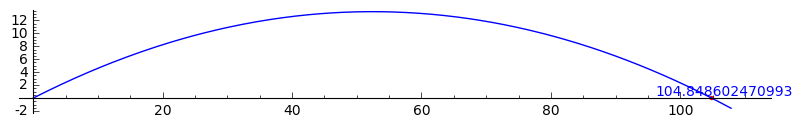

3/20*pi

In [1]:
from ipywidgets import interact, interactive
from ipywidgets import IntSlider, Text, Dropdown

def wurf(v_0,alpha,g=10):
    f(x) = -g*x^2/(2*v_0^2*(cos(alpha))^2)+tan(alpha)*x
    return f
def grad_to_arc(alpha):
    return alpha*pi/180
def kmh_to_ms(v):
    return v*3.6

@interact(v = Text(value='10',description='Abwurfgeschwindigkeit'), 
          Einheit = Dropdown(value = 'km/h', options = ['km/h','m/s']), 
          a = IntSlider(value=45,min=1,max=89,description='Winkel') )
def interwurf(v = 10, Einheit = 'km/h', a = 45):
    a = grad_to_arc(a)
    if(Einheit=='km/h'):
        v = kmh_to_ms(int(v))
    para = wurf(v,a)
    NST = solve(para==0,x)
    for i in [0,1]:
        NST[i]=NST[i].rhs() 
    NST.sort()
    len = NST[1]
    max = solve(diff(para)==0,x)[0].rhs()
    maxwert = wurf(v,a)(max)
    A = plot(para,(x,0,len+3),aspect_ratio=1)
    A += point((len,0),color='red')
    A += text(n(len),(len+2,1))
    show(A,ymin=-2,ymax=maxwert,xmin=0, xmax=len+7)
    return a